In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

In [2]:
df_train = pd.read_csv('Titanic_train.csv',usecols = ['Age','Pclass','Sex'])
df_train

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [3]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

        missing_rate
Pclass      0.000000
Sex         0.000000
Age         0.198653


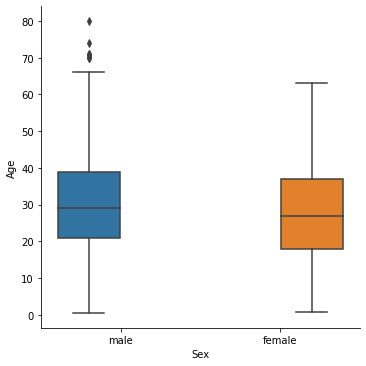

In [4]:
#觀察資料(年齡和性別的關係)
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的年齡特性有關連，但差異不大

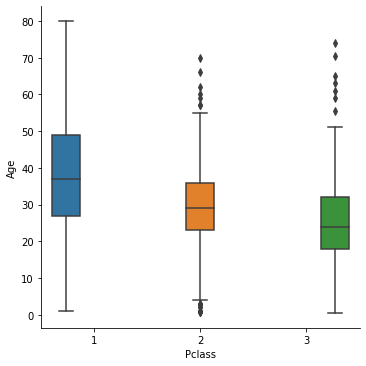

In [5]:
#觀察資料(年齡和艙等的關係)
g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train,kind="box")
#艙等間的年齡特性有關連，差異不是很大

D:\YUFEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


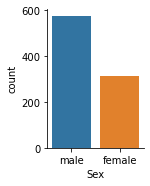

In [6]:
#男生女生人數
g = sns.catplot("Sex",
                data=df_train,
                kind="count", height=2.5, aspect=.8)

D:\YUFEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


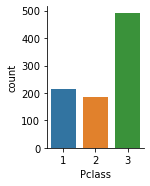

In [7]:
#各艙等的人數
g = sns.catplot("Pclass",
                data=df_train,
                kind="count", height=2.5, aspect=.8)

In [8]:
# 細看遺失資料的樣態
missing_index=df_train.isnull()
display(df_train[missing_index.values==True])

,Pclass,Sex,Age
5,3,male,NaN
17,2,male,NaN
19,3,female,NaN
26,3,male,NaN
28,3,female,NaN
...,...,...,...
859,3,male,NaN
863,3,female,NaN
868,3,male,NaN
878,3,male,NaN


In [9]:
#透過 KNN 來補值
#K=1,weights= uniform
#Step1: 離散轉連續型資料
data=df_train.copy() #複製一份資料給 data
#轉型，透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
display(df_train)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [10]:
#Step 2 :計算資料點的倆倆距離(計算歐基里德距離)
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(df_train)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [11]:
#Step3: 透過 KNN 進行補值
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(df_train))
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,26.0
889,1.0,1.0,26.0


In [12]:
print(df_train['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [13]:
print(df_filled.describe())

                0           1           2
count  891.000000  891.000000  891.000000
mean     2.308642    0.647587   29.387396
std      0.836071    0.477990   13.832217
min      1.000000    0.000000    0.420000
25%      2.000000    0.000000   22.000000
50%      3.000000    1.000000   26.000000
75%      3.000000    1.000000   37.000000
max      3.000000    1.000000   80.000000


In [14]:
#K=3,weights= uniform
df_train = pd.read_csv('Titanic_train.csv',usecols = ['Age','Pclass','Sex'])
df_train
#Step1: 離散轉連續型資料
data=df_train.copy() #複製一份資料給 data
#轉型，透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
display(df_train)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [15]:
#Step3: 透過 KNN 進行補值
# 設定 k 值
value_neighbors=3
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(df_train))
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,19.0
889,1.0,1.0,26.0


In [16]:
print(df_filled.describe())

                0           1           2
count  891.000000  891.000000  891.000000
mean     2.308642    0.647587   28.530681
std      0.836071    0.477990   13.727408
min      1.000000    0.000000    0.420000
25%      2.000000    0.000000   19.666667
50%      3.000000    1.000000   26.000000
75%      3.000000    1.000000   36.000000
max      3.000000    1.000000   80.000000


In [17]:
#K=1,weights= distance
df_train = pd.read_csv('Titanic_train.csv',usecols = ['Age','Pclass','Sex'])
df_train
#Step1: 離散轉連續型資料
data=df_train.copy() #複製一份資料給 data
#轉型，透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
display(df_train)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [18]:
#Step3: 透過 KNN 進行補值
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled = pd.DataFrame(imputer.fit_transform(df_train))
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,26.0
889,1.0,1.0,26.0


In [19]:
print(df_filled.describe())

                0           1           2
count  891.000000  891.000000  891.000000
mean     2.308642    0.647587   29.387396
std      0.836071    0.477990   13.832217
min      1.000000    0.000000    0.420000
25%      2.000000    0.000000   22.000000
50%      3.000000    1.000000   26.000000
75%      3.000000    1.000000   37.000000
max      3.000000    1.000000   80.000000


In [20]:
#K=3,weights= distance
df_train = pd.read_csv('Titanic_train.csv',usecols = ['Age','Pclass','Sex'])
df_train
#Step1: 離散轉連續型資料
data=df_train.copy() #複製一份資料給 data
#轉型，透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
display(df_train)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [21]:
#Step3: 透過 KNN 進行補值
# 設定 k 值
value_neighbors=3
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled = pd.DataFrame(imputer.fit_transform(df_train))
#display(df_train[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,19.0
889,1.0,1.0,26.0


In [22]:
print(df_filled.describe())

                0           1           2
count  891.000000  891.000000  891.000000
mean     2.308642    0.647587   28.530681
std      0.836071    0.477990   13.727408
min      1.000000    0.000000    0.420000
25%      2.000000    0.000000   19.666667
50%      3.000000    1.000000   26.000000
75%      3.000000    1.000000   36.000000
max      3.000000    1.000000   80.000000


In [23]:
#觀察Age變化
#KNN補值前的Age平均數及標準差皆較補植後的值略為高
#KNN補值方法K=1,K=3對Age有影響
#KNN補值權重uniform及distance方法對Age無影響